In [1]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.9 MB/s eta 0:00:00


In [2]:
import mysql.connector
import pandas as pd

In [3]:
host = '34.69.233.123'
user = 'root'
password = ''
database = 'lanche_do_tutti'

In [4]:
!curl ipecho.net/plain

34.169.67.202

In [6]:
def consulta(query, tabela):
  connection = mysql.connector.connect(
      host = host,
      user = user,
      password = password,
      database = database
  )
  cursor = connection.cursor()

  try:
    cursor.execute(query)
    result = cursor.fetchall()
    globals()[tabela] = pd.DataFrame(result, columns=cursor.column_names)
    display(globals()[tabela])
  finally:
    cursor.close()
    connection.close()

Saving Screenshot 2024-11-19 13.24.21.png to Screenshot 2024-11-19 13.24.21.png


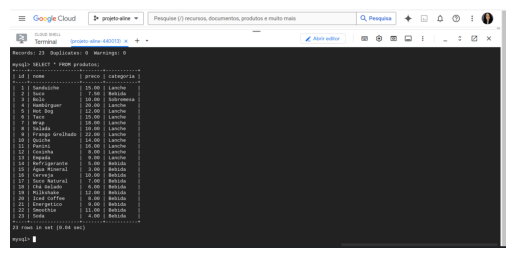

In [7]:
from google.colab import files
import matplotlib.pyplot as plt
import cv2

uploaded = files.upload()

for filename in uploaded.keys():
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [8]:
consulta('''
SHOW TABLES;
''', '''df_tabelas''')

,Tables_in_lanche_do_tutti
0,precos
1,produtos
2,vendas


In [9]:
consulta('''
SELECT * FROM produtos
''', '''df_produtos''')

,id,nome,preco,categoria
0,1,Sanduíche,15.00,Lanche
1,2,Suco,7.50,Bebida
2,3,Bolo,10.00,Sobremesa
3,4,Hambúrguer,20.00,Lanche
4,5,Hot Dog,12.00,Lanche
5,6,Taco,15.00,Lanche
6,7,Wrap,18.00,Lanche
7,8,Salada,10.00,Lanche
8,9,Frango Grelhado,22.00,Lanche
9,10,Quiche,14.00,Lanche


In [10]:
consulta('''
SELECT * FROM precos;
''', '''df_precos''')

,produto_id,preco,data_validade
0,1,15.00,2025-01-01
1,2,7.50,2025-01-01
2,3,10.00,2025-01-01
3,4,20.00,2025-01-01
4,5,12.00,2025-01-01
5,6,15.00,2025-01-01
6,7,18.00,2025-01-01
7,8,10.00,2025-01-01
8,9,22.00,2025-01-01
9,10,14.00,2025-01-01


In [11]:
consulta('''
DESCRIBE vendas;
''', ''' ''')

,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,produto_id,int,YES,MUL,None,
2,quantidade,int,NO,,None,
3,data_venda,date,YES,,None,
4,cliente,varchar(255),YES,,None,
5,produto,varchar(255),YES,,None,
6,categoria,varchar(255),YES,,None,
7,data,date,YES,,None,


#1. Verificar a Média de Preços dos Produtos

In [12]:
consulta('''
SELECT AVG(preco) AS media_preco
FROM precos;
''', ''' ''')

,media_preco
0,10.934783


#2. Listar Produtos com o Maior Preço

In [13]:
consulta('''
SELECT p.nome AS produto, pr.preco
FROM produtos p
JOIN precos pr ON p.id = pr.produto_id
ORDER BY pr.preco DESC
LIMIT 5;
''', ''' ''')

,produto,preco
0,Frango Grelhado,22.00
1,Hambúrguer,20.00
2,Wrap,18.00
3,Panini,16.00
4,Sanduíche,15.00


#3. Comparativo de Preços por Categoria

In [14]:
consulta('''
SELECT p.categoria, AVG(pr.preco) AS media_preco
FROM produtos p
JOIN precos pr ON p.id = pr.produto_id
GROUP BY p.categoria;
''', ''' ''')

,categoria,media_preco
0,Lanche,14.454545
1,Bebida,7.500000
2,Sobremesa,10.000000


# 4. Total de Vendas por Produto

In [15]:
consulta('''
SELECT p.nome AS produto, SUM(v.quantidade) AS total_vendas
FROM vendas v
JOIN produtos p ON v.produto_id = p.id
GROUP BY p.nome
ORDER BY total_vendas DESC;
''', ''' ''')

,produto,total_vendas
0,Sanduíche,39
1,Suco,17
2,Bolo,15
3,Hambúrguer,8


# 5. Total de Vendas por Data

In [16]:
consulta('''
SELECT data_venda, SUM(quantidade) AS total_vendas
FROM vendas
GROUP BY data_venda
ORDER BY data_venda;
''', ''' ''')

,data_venda,total_vendas
0,2023-10-19,30
1,2023-10-20,5
2,2023-11-01,13
3,2023-11-05,6
4,2023-11-10,15
5,2023-11-11,2
6,2023-11-15,4
7,2023-11-18,4


#6. Vendas de um Produto Específico

In [17]:
consulta('''
SELECT v.*
FROM vendas v
JOIN produtos p ON v.produto_id = p.id
WHERE p.nome = 'Suco';
''', ''' ''')

,id,produto_id,quantidade,data_venda,cliente,produto,categoria,data
0,2,2,5,2023-10-20,None,None,None,None
1,5,2,2,2023-11-11,None,None,None,None
2,8,2,5,2023-11-01,None,None,None,None
3,13,2,5,2023-11-01,None,None,None,None


#7. Vendas Acima de um Certo Limite

In [18]:
consulta('''
SELECT *
FROM vendas
WHERE quantidade > 5;
''', ''' ''')

,id,produto_id,quantidade,data_venda,cliente,produto,categoria,data
0,1,1,10,2023-10-19,None,None,None,None
1,7,1,10,2023-10-19,None,None,None,None
2,10,3,7,2023-11-10,None,None,None,None
3,12,1,10,2023-10-19,None,None,None,None
4,15,3,7,2023-11-10,None,None,None,None


#8. Vendas por Produto

In [19]:
consulta('''
SELECT p.nome AS produto, SUM(v.quantidade) AS total_vendas
FROM vendas v
JOIN produtos p ON v.produto_id = p.id
GROUP BY p.nome
ORDER BY total_vendas DESC;
''', ''' ''')

,produto,total_vendas
0,Sanduíche,39
1,Suco,17
2,Bolo,15
3,Hambúrguer,8


#9. Vendas em um Intervalo de Datas

In [20]:
consulta('''
SELECT *
FROM vendas
WHERE data_venda BETWEEN '2023-11-01' AND '2023-11-30';
''', ''' ''')

,id,produto_id,quantidade,data_venda,cliente,produto,categoria,data
0,3,1,3,2023-11-01,None,None,None,None
1,4,3,1,2023-11-10,None,None,None,None
2,5,2,2,2023-11-11,None,None,None,None
3,6,4,4,2023-11-18,None,None,None,None
4,8,2,5,2023-11-01,None,None,None,None
5,9,1,3,2023-11-05,None,None,None,None
6,10,3,7,2023-11-10,None,None,None,None
7,11,4,2,2023-11-15,None,None,None,None
8,13,2,5,2023-11-01,None,None,None,None
9,14,1,3,2023-11-05,None,None,None,None


#10. Vendas Mensais

In [21]:
consulta('''
SELECT DATE_FORMAT(data_venda, '%Y-%m') AS mes, SUM(quantidade) AS total_vendas
FROM vendas
GROUP BY mes
ORDER BY mes;
''', ''' ''')

,mes,total_vendas
0,2023-10,35
1,2023-11,44
